In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Phishing_Legitimate_full.csv")

In [3]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# EDA

In [4]:
data.shape

(10000, 50)

In [5]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [6]:
data.dtypes

,0
id,int64
NumDots,int64
SubdomainLevel,int64
PathLevel,int64
UrlLength,int64
NumDash,int64
NumDashInHostname,int64
AtSymbol,int64
TildeSymbol,int64
NumUnderscore,int64


In [7]:
data.isna().sum()

,0
id,0
NumDots,0
SubdomainLevel,0
PathLevel,0
UrlLength,0
NumDash,0
NumDashInHostname,0
AtSymbol,0
TildeSymbol,0
NumUnderscore,0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


In [9]:
data.CLASS_LABEL.value_counts()

,count
CLASS_LABEL,
1,5000
0,5000


Text(0, 0.5, 'Count')

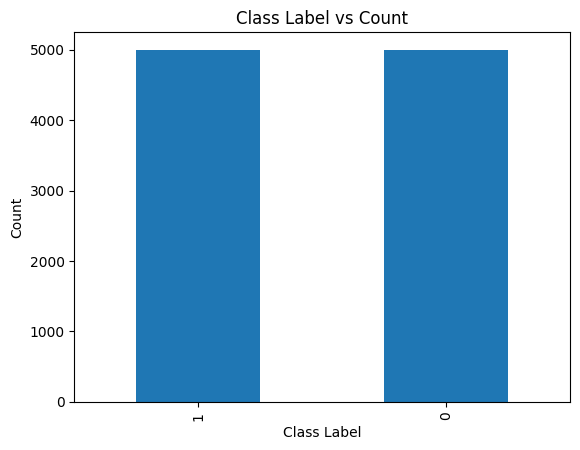

In [10]:
data['CLASS_LABEL'].value_counts().plot(kind='bar')
plt.title('Class Label vs Count')
plt.xlabel('Class Label')
plt.ylabel('Count')

In [11]:
data.rename(columns={'CLASS_LABEL':'Label'},inplace=True)

<Axes: ylabel='count'>

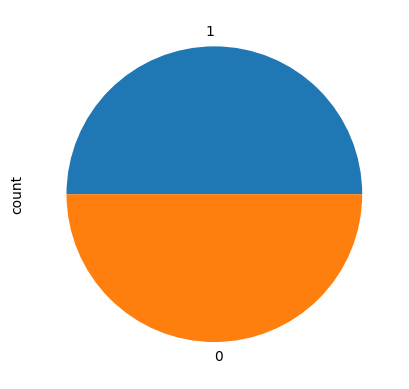

In [12]:
data['Label'].value_counts().plot(kind='pie')

In [13]:
def discrete_univariate_analysis(data, feature):
    total = len(data[feature])
    count = data[feature].nunique()
    plt.figure(figsize=(count+1, 5))
    plt.xticks(rotation = 90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette='flare', order = \
        data[feature].value_counts().index.sort_values(ascending = False))
    for p in ax.patches:
        label = "{:.1f}%".format(100*p.get_height()/total)
        x = p.get_x()+p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x,y), ha="center", va="center", size=12, xytext=(0,5), textcoords="offset points")
    plt.show()

<ipython-input-13-56f978766277>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette='flare', order = \


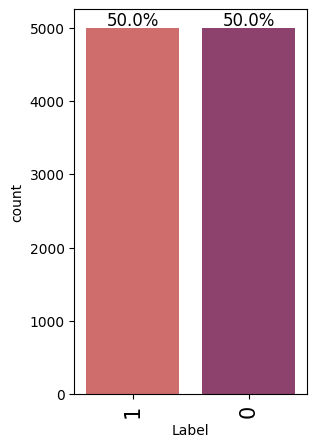

In [14]:
discrete_univariate_analysis(data, 'Label')

In [15]:
data.corr()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Label
id,1.000000,-0.238066,0.027976,-0.234909,-0.046967,0.231091,-0.107170,0.009916,-0.084148,0.024811,...,0.204099,-0.081004,0.000481,0.063732,-0.010836,-0.020932,-0.169502,-0.068570,0.465757,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,...,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,...,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,-0.234909,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,...,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,-0.046967,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,...,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,...,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,-0.107170,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,...,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.009916,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,...,-0.012422,-0.003160,-0.003067,0.003031,-0.007469,-0.006885,-0.004207,0.011307,0.013235,-0.017323
TildeSymbol,-0.084148,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,...,-0.039905,-0.011051,-0.020400,0.016614,-0.036087,0.022478,0.022098,0.058519,-0.000144,0.095864
NumUnderscore,0.024811,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,...,-0.010341,-0.019348,-0.019467,0.003353,-0.257480,0.014952,-0.053835,-0.047775,0.100214,-0.098869


In [16]:
def heatmap(data,start_index,end_index):
    new_data=pd.DataFrame(data.iloc[:,start_index:end_index])
    plt.figure(figsize=(10,8))
    sns.heatmap(new_data.corr(),annot=True,fmt='.2f')

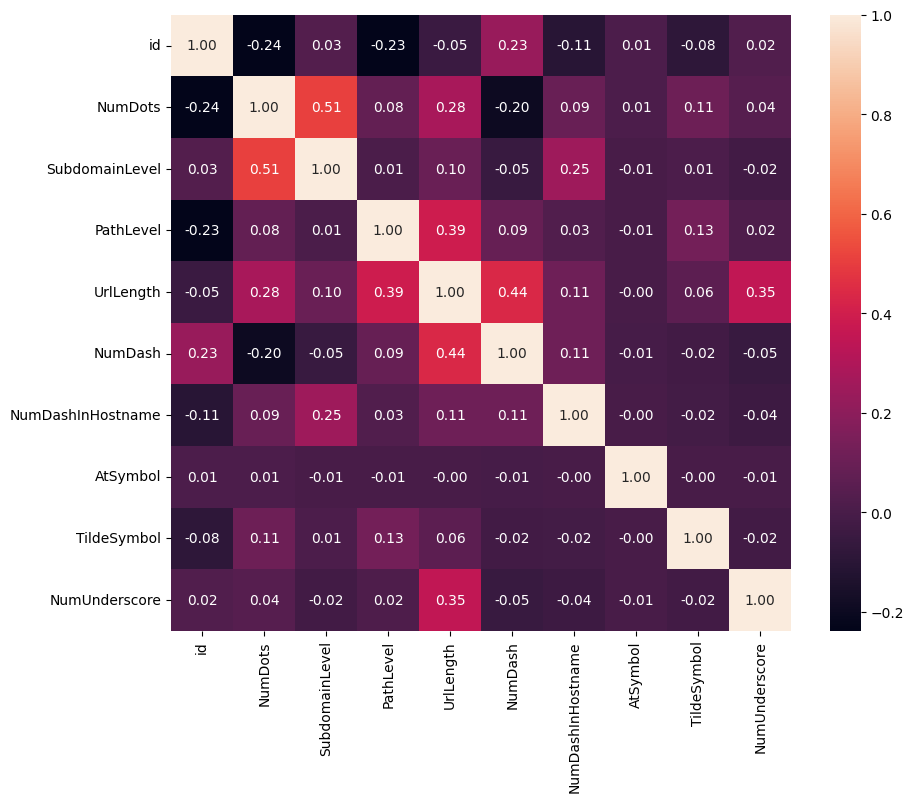

In [17]:
heatmap(data,0,10)

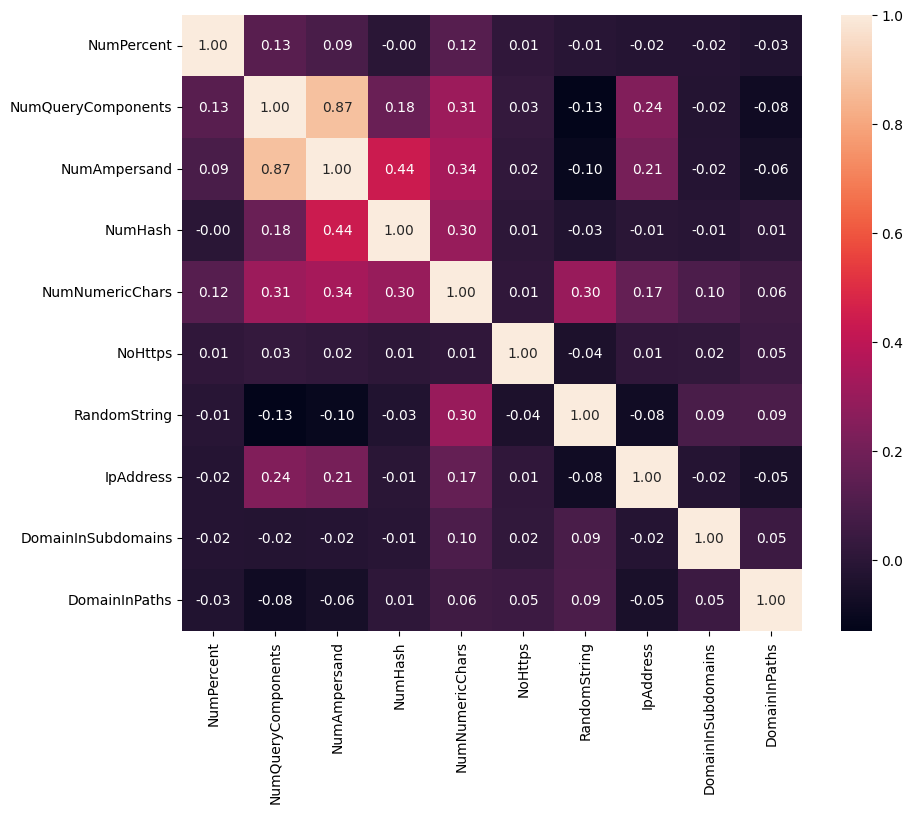

In [18]:
heatmap(data,10,20)

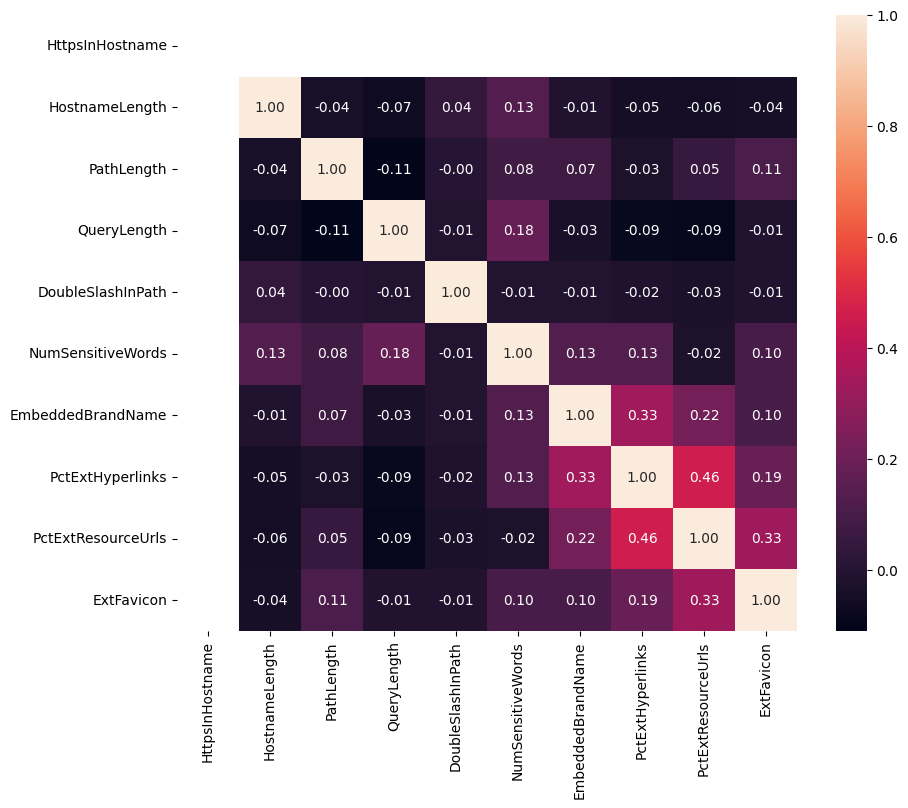

In [19]:
heatmap(data,20,30)

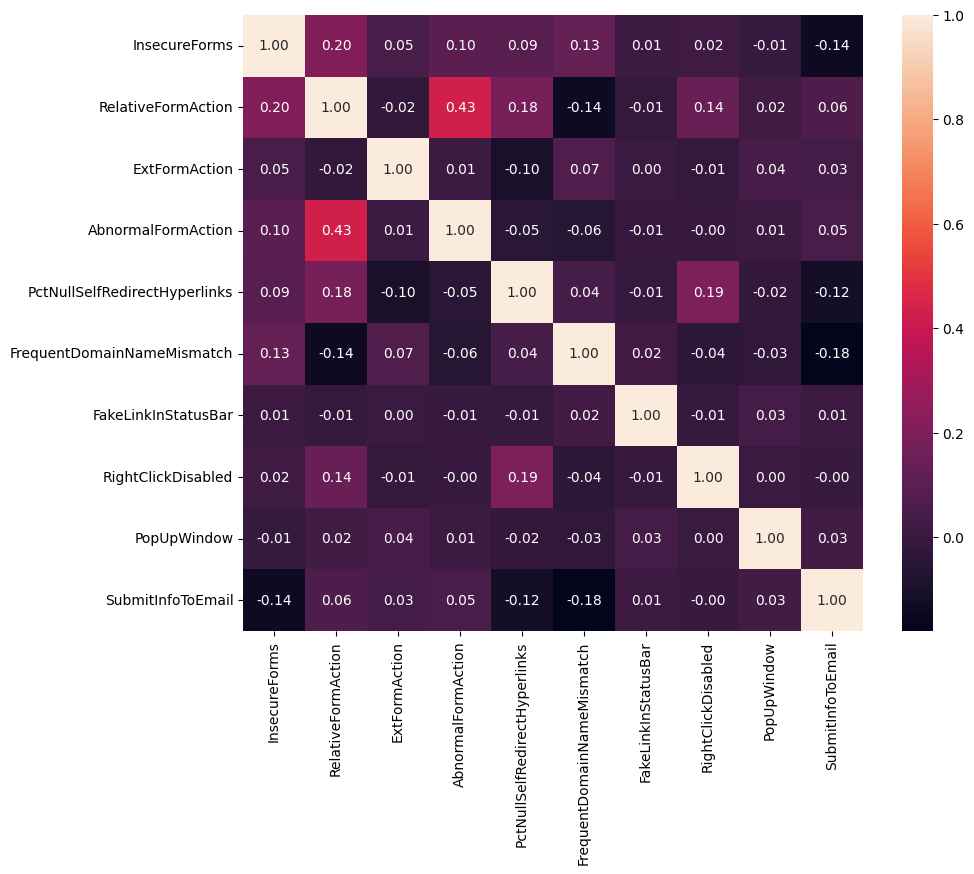

In [20]:
heatmap(data,30,40)

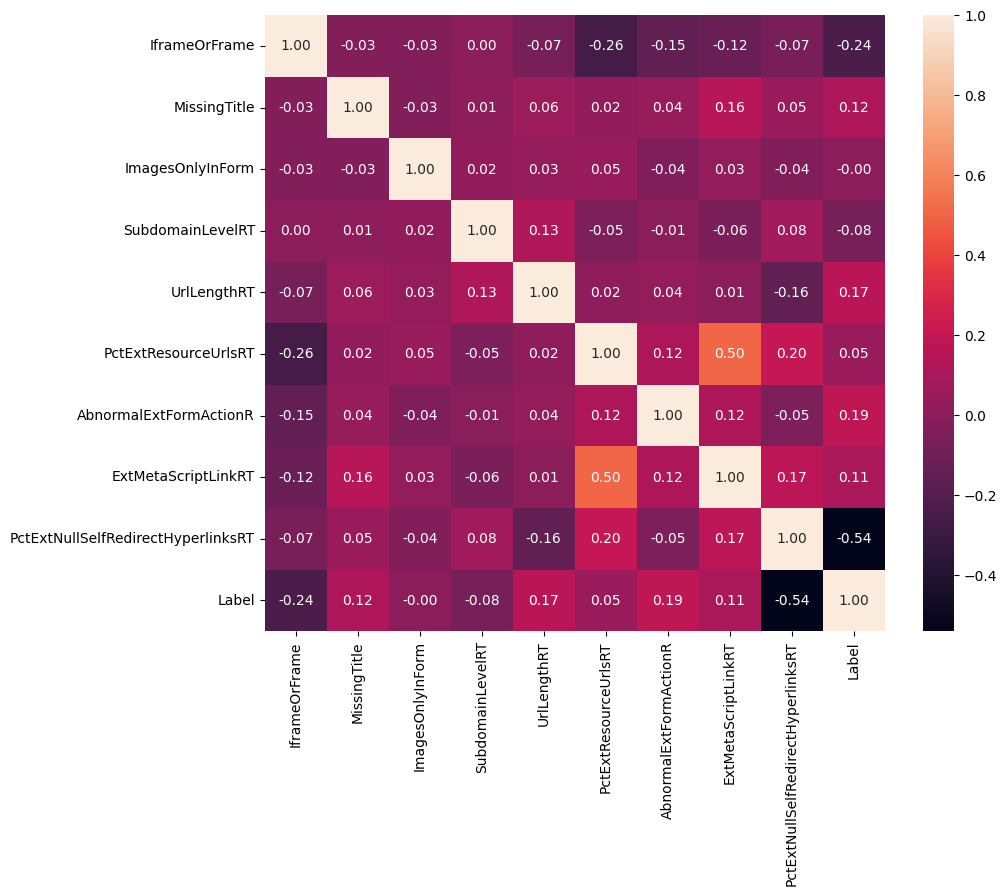

In [21]:
heatmap(data,40,50)

In [22]:
x=data.drop(columns=['id','Label'],axis=1)
y=data['Label']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
x_train
x_train.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [25]:
x_test

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
6252,1,0,3,60,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4684,3,1,5,75,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,-1
1731,1,0,3,64,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
4742,3,0,4,71,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,-1,1
4521,3,1,2,52,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,2,0,4,62,4,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,1
1074,2,0,3,38,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
3063,3,1,3,60,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,1,1
6487,1,0,3,74,2,0,0,0,1,0,...,0,1,0,0,1,0,-1,1,0,1


In [26]:
y_train

,Label
9069,0
2603,1
7738,0
1579,1
5058,0
...,...
5734,0
5191,0
5390,0
860,1


In [27]:
y_test

,Label
6252,0
4684,1
1731,1
4742,1
4521,1
...,...
8014,0
1074,1
3063,1
6487,0


We will now use mutual information classifier to find non-linear and linear correlation between the features and "Label"

In [28]:
from sklearn.feature_selection import mutual_info_classif

In [29]:
x=data.drop(['id','Label'],axis=1)

In [30]:
y=data['Label']

In [31]:
discrete_features = x.dtypes ==int

In [32]:
mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

,MI Scores
PctExtHyperlinks,4.681100e-01
PctExtResourceUrls,2.942813e-01
PctNullSelfRedirectHyperlinks,2.331685e-01
PctExtNullSelfRedirectHyperlinksRT,2.123850e-01
NumNumericChars,1.326711e-01
FrequentDomainNameMismatch,1.254908e-01
ExtMetaScriptLinkRT,1.175434e-01
NumDash,1.140136e-01
SubmitInfoToEmail,7.802617e-02
NumDots,6.553700e-02


In [33]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mi Scores")

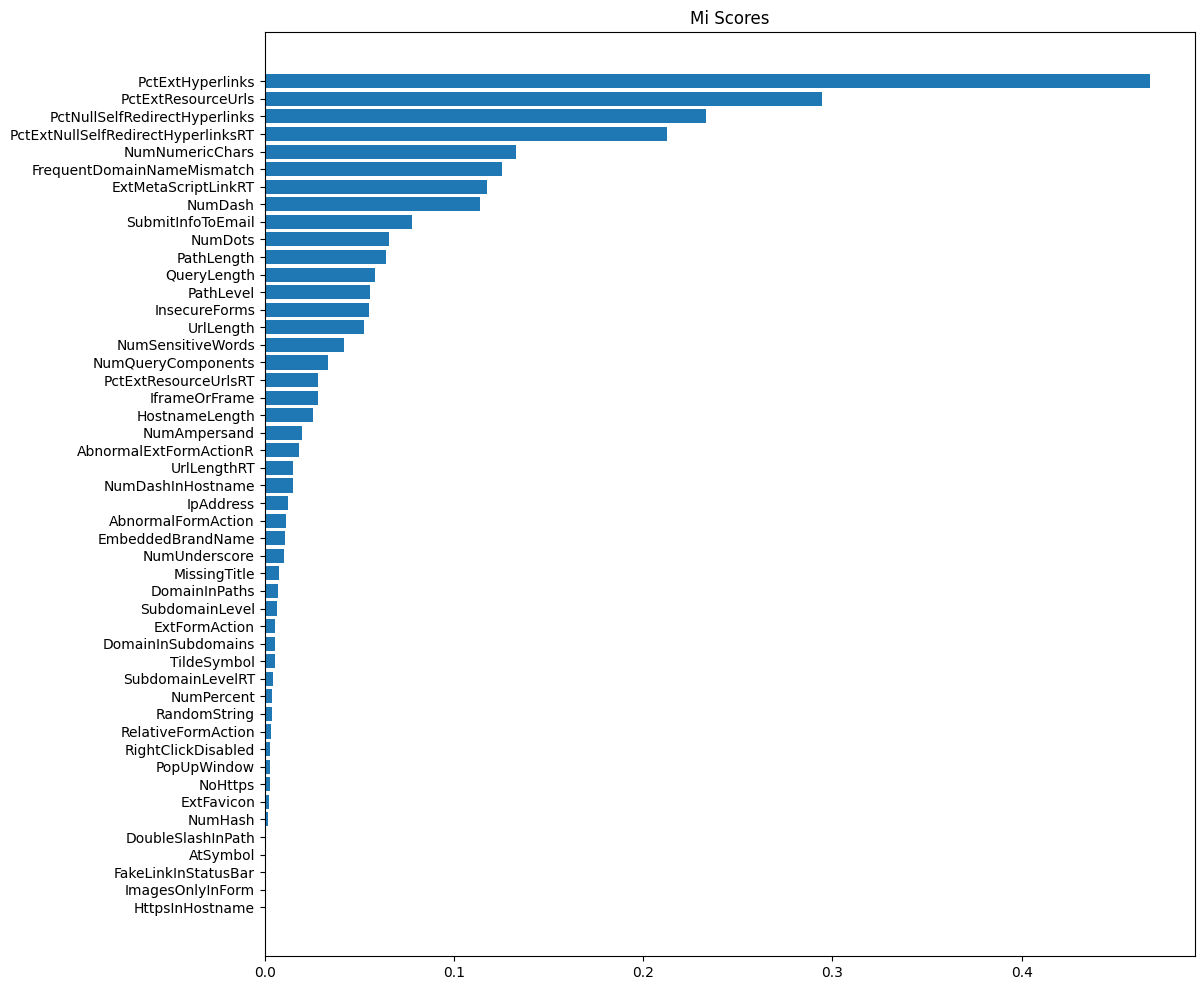

In [34]:
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as Rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
def train_logistic(data, top_n):
    top_n_features= mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    x=data[top_n_features]
    y= data['Label']

    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)

    LR = LogisticRegression(max_iter=10000)
    LR.fit(x_train, y_train)

    y_pred= LR.predict(x_test)

    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)

    return precision, recall,f1,accuracy

In [37]:
arr=[]
for i in range(15,51,1):
    precision,recall,f1,accuracy=train_logistic(data,i)
    print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(i,precision,recall,f1,accuracy))
    arr.append([i,precision,recall,f1,accuracy])

performance for logistic Model with Top 15 features is precision :0.8978240302743614, recall :0.9313052011776252, f1 score :0.9142581888246628, accuracy :0.911
performance for logistic Model with Top 16 features is precision :0.9079457364341085, recall :0.9231527093596059, f1 score :0.9154860771861261, accuracy :0.9135
performance for logistic Model with Top 17 features is precision :0.9108216432865731, recall :0.9323076923076923, f1 score :0.9214394323365434, accuracy :0.9225
performance for logistic Model with Top 18 features is precision :0.9229229229229229, recall :0.9238476953907816, f1 score :0.9233850776164246, accuracy :0.9235
performance for logistic Model with Top 19 features is precision :0.9123314065510597, recall :0.9366963402571711, f1 score :0.9243533430941923, accuracy :0.9225
performance for logistic Model with Top 20 features is precision :0.9333333333333333, recall :0.9305962854349951, f1 score :0.9319627998042095, accuracy :0.9305
performance for logistic Model with

In [38]:
df = pd.DataFrame(arr,columns=['num_of_features','precision','recall','f1_score','accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,15,0.897824,0.931305,0.914258,0.9110
1,16,0.907946,0.923153,0.915486,0.9135
2,17,0.910822,0.932308,0.921439,0.9225
3,18,0.922923,0.923848,0.923385,0.9235
4,19,0.912331,0.936696,0.924353,0.9225
5,20,0.933333,0.930596,0.931963,0.9305
6,21,0.922631,0.912919,0.917749,0.9145
7,22,0.921381,0.941234,0.931202,0.9290
8,23,0.921026,0.944269,0.932503,0.9350
9,24,0.919212,0.944332,0.931603,0.9315


<Axes: xlabel='num_of_features', ylabel='precision'>

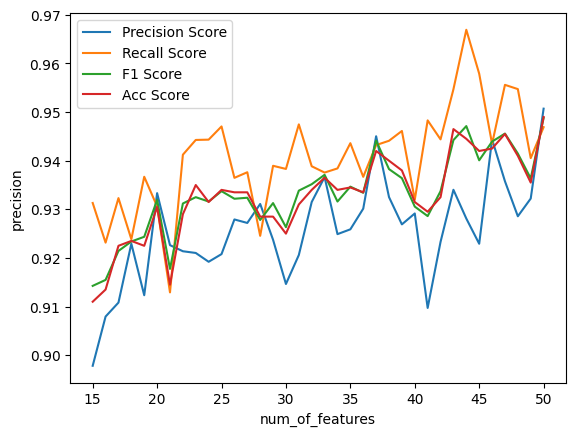

In [39]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

# Random Forest Classification

In [40]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X=data[top_n_features]
    у=data['Label']

    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, shuffle=True)

    rfc= Rfc(n_estimators=500,
             max_depth=32,
             max_features=1.0,
            )

    rfc.fit(x_train, y_train)

    y_pred = rfc.predict(x_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall,f1,accuracy

In [41]:
arr=[]
for i in range(15,51,1):
    precision,recall,f1,accuracy=train_rfc(data,i)
    print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(i,precision,recall,f1,accuracy))
    arr.append([i,precision,recall,f1,accuracy])

performance for logistic Model with Top 15 features is precision :0.9734964322120285, recall :0.9825102880658436, f1 score :0.9779825908858167, accuracy :0.9785
performance for logistic Model with Top 16 features is precision :0.9685658153241651, recall :0.9830508474576272, f1 score :0.9757545769421079, accuracy :0.9755
performance for logistic Model with Top 17 features is precision :0.975, recall :0.9878419452887538, f1 score :0.9813789632611978, accuracy :0.9815
performance for logistic Model with Top 18 features is precision :0.9704433497536946, recall :0.9899497487437185, f1 score :0.9800995024875622, accuracy :0.98
performance for logistic Model with Top 19 features is precision :0.96900826446281, recall :0.9730290456431535, f1 score :0.9710144927536232, accuracy :0.972
performance for logistic Model with Top 20 features is precision :0.9806320081549439, recall :0.9796334012219959, f1 score :0.9801324503311258, accuracy :0.9805
performance for logistic Model with Top 21 features 

In [42]:
df = pd.DataFrame(arr,columns=['num_of_features','precision','recall','f1_score','accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,15,0.973496,0.982510,0.977983,0.9785
1,16,0.968566,0.983051,0.975755,0.9755
2,17,0.975000,0.987842,0.981379,0.9815
3,18,0.970443,0.989950,0.980100,0.9800
4,19,0.969008,0.973029,0.971014,0.9720
5,20,0.980632,0.979633,0.980132,0.9805
6,21,0.979290,0.980257,0.979773,0.9795
7,22,0.977033,0.977969,0.977501,0.9765
8,23,0.970884,0.988753,0.979737,0.9800
9,24,0.986014,0.983068,0.984539,0.9845


<Axes: xlabel='num_of_features', ylabel='precision'>

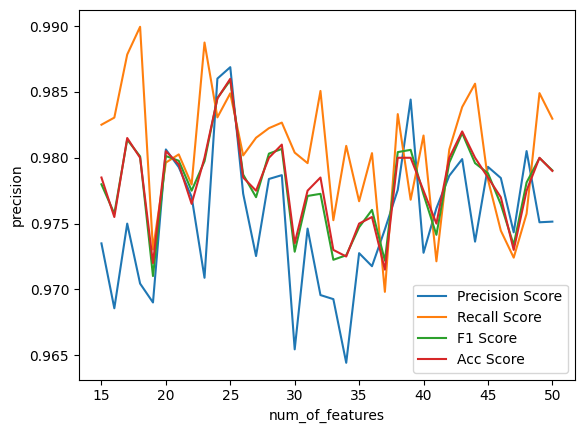

In [43]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [44]:
top_n_features = mi_scores.sort_values(ascending=False).head(27).index.tolist()
x = data[top_n_features]
y = data['Label']

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)

rfc= Rfc(n_estimators=500,
         max_depth=32,
         max_features=1.0,
        )

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test,)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(27,precision,recall,f1,accuracy))

performance for logistic Model with Top 27 features is precision :0.9710867397806581, recall :0.9818548387096774, f1 score :0.9764411027568922, accuracy :0.9765


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1008
           1       0.97      0.98      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
k_near = KNeighborsClassifier(n_neighbors=1)

In [47]:
k_near.fit(x_train,y_train)

Y_pre_test = k_near.predict(x_test)
Y_pre_train = k_near.predict(x_train)

In [48]:
train_accuracy_KNN = (accuracy_score(Y_pre_train, y_train))*100
print('Accuracy for train dataset for K-neariest :%2.f '% train_accuracy_KNN , '%')

test_accuracy_KNN = (accuracy_score(Y_pre_test, y_test))*100
print('Accuracy for test dataset for K-neariest :%2.f '% test_accuracy_KNN , '%')

Accuracy for train dataset for K-neariest :100  %
Accuracy for test dataset for K-neariest :86  %


In [49]:
print(classification_report(y_test, Y_pre_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1008
           1       0.85      0.88      0.86       992

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [51]:
gnb.fit(x_train,y_train)

Y_pre_test = gnb.predict(x_test)
Y_pre_train = gnb.predict(x_train)

In [52]:
train_accuracy_NB = (accuracy_score(Y_pre_train, y_train))*100
print('Accuracy for train dataset for Naive Bayes : %.2f ' % train_accuracy_NB ,'%')

test_accuracy_NB = (accuracy_score(Y_pre_test, y_test))*100
print('Accuracy for test dataset for Naive Bayes : %.2f ' % test_accuracy_NB ,'%')

Accuracy for train dataset for Naive Bayes : 83.67  %
Accuracy for test dataset for Naive Bayes : 83.70  %


In [53]:
print(classification_report(y_test, Y_pre_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.86      1008
           1       0.94      0.72      0.81       992

    accuracy                           0.84      2000
   macro avg       0.86      0.84      0.83      2000
weighted avg       0.86      0.84      0.83      2000



In [54]:
import joblib

# Store each model and its F1 score
model_scores = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
lr_f1 = f1_score(y_test, lr.predict(x_test))
model_scores['LogisticRegression'] = (lr_f1, lr)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=1.0)
rfc.fit(x_train, y_train)
rfc_f1 = f1_score(y_test, rfc.predict(x_test))
model_scores['RandomForest'] = (rfc_f1, rfc)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_f1 = f1_score(y_test, knn.predict(x_test))
model_scores['KNN'] = (knn_f1, knn)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_f1 = f1_score(y_test, nb.predict(x_test))
model_scores['NaiveBayes'] = (nb_f1, nb)

# ✅ Select the best model based on F1 score
best_model_name = max(model_scores, key=lambda k: model_scores[k][0])
best_f1_score, best_model = model_scores[best_model_name]

print(f"\n✅ Best Model: {best_model_name} with F1 Score: {best_f1_score:.4f}")
joblib.dump(best_model, "best_phishing_model.pkl")
print("✅ Model saved as 'best_phishing_model.pkl'")



✅ Best Model: RandomForest with F1 Score: 0.9769
✅ Model saved as 'best_phishing_model.pkl'


In [71]:
import re
from urllib.parse import urlparse
import pandas as pd
import joblib
import requests
from bs4 import BeautifulSoup

# Feature extraction function with all 27 features
def extract_features_from_url(url):
    parsed = urlparse(url)
    hostname = parsed.hostname or ""
    path = parsed.path or ""
    query = parsed.query or ""

    # Fetch webpage content with error handling
    try:
        response = requests.get(url, timeout=5, allow_redirects=True)
        soup = BeautifulSoup(response.text, 'html.parser')
        final_url = response.url  # For UrlLengthRT
    except Exception:
        soup = None
        final_url = url

    # # 1. PctExtHyperlinks
    # total_links = 0
    # external_links = 0
    # if soup:
    #     for link in soup.find_all('a', href=True):
    #         total_links += 1
    #         link_url = urlparse(link['href']).hostname or ""
    #         if link_url and link_url != hostname:
    #             external_links += 1
    #     pct_ext_hyperlinks = (external_links / total_links * 100) if total_links > 0 else 0
    # else:
    #     pct_ext_hyperlinks = 0

    # 2. PctExtResourceUrls
    total_resources = 0
    external_resources = 0
    if soup:
        for tag in soup.find_all(['img', 'script', 'link'], src=True) + soup.find_all('link', href=True):
            total_resources += 1
            resource_url = urlparse(tag.get('src') or tag.get('href') or "").hostname or ""
            if resource_url and resource_url != hostname:
                external_resources += 1
        pct_ext_resource_urls = (external_resources / total_resources * 100) if total_resources > 0 else 0
    else:
        pct_ext_resource_urls = 0

    # 3. PctNullSelfRedirectHyperlinks
    total_links = 0
    null_self_redirects = 0
    if soup:
        for link in soup.find_all('a', href=True):
            total_links += 1
            href = link['href'].strip()
            if not href or href == "#" or href == url or href.startswith(f"{url}#"):
                null_self_redirects += 1
        pct_null_self_redirects = (null_self_redirects / total_links * 100) if total_links > 0 else 0
    else:
        pct_null_self_redirects = 0

    # 4. PctExtNullSelfRedirectHyperlinksRT
    total_links = 0
    ext_null_self_redirects = 0
    if soup:
        for link in soup.find_all('a', href=True):
            total_links += 1
            href = link['href'].strip()
            link_host = urlparse(href).hostname or ""
            if (not href or href == "#" or href == url or href.startswith(f"{url}#")) and link_host and link_host != hostname:
                ext_null_self_redirects += 1
        pct_ext_null_self_redirects_rt = (ext_null_self_redirects / total_links * 100) if total_links > 0 else 0
    else:
        pct_ext_null_self_redirects_rt = 0

    # 5. FrequentDomainNameMismatch
    mismatch_count = 0
    total_resources = 0
    if soup:
        for tag in soup.find_all(['a', 'img', 'script', 'link'], href=True, src=True):
            resource_url = urlparse(tag.get('href') or tag.get('src') or "").hostname or ""
            if resource_url and resource_url != hostname:
                mismatch_count += 1
            total_resources += 1
        frequent_domain_mismatch = (mismatch_count / total_resources) if total_resources > 0 else 0
    else:
        frequent_domain_mismatch = 0

    # 6. ExtMetaScriptLinkRT
    ext_meta_script_link = 0
    if soup:
        for tag in soup.find_all(['script', 'link'], src=True, href=True):
            resource_url = urlparse(tag.get('src') or tag.get('href') or "").hostname or ""
            if resource_url and resource_url != hostname:
                ext_meta_script_link = 1
                break
    else:
        ext_meta_script_link = 0

    # 7. SubmitInfoToEmail
    submit_to_email = 0
    if soup:
        for form in soup.find_all('form', action=True):
            action = form['action'].lower()
            if "@" in action and "." in action.split("@")[1]:
                submit_to_email = 1
                break
    else:
        submit_to_email = 0

    # 8. InsecureForms
    insecure_forms = 0
    if soup:
        for form in soup.find_all('form', action=True):
            action_url = urlparse(form['action'])
            if action_url.scheme and action_url.scheme.lower() != "https":
                insecure_forms = 1
                break
    else:
        insecure_forms = 0

    # 9. NumSensitiveWords
    sensitive_words = ["login", "password", "verify", "update", "account", "security", "reset"]
    num_sensitive_words = sum(1 for word in sensitive_words if word in url.lower())

    # 10. IframeOrFrame
    iframe_or_frame = 1 if soup and (soup.find('iframe') or soup.find('frame')) else 0

    # 11. AbnormalExtFormActionR
    abnormal_ext_form_action = 0
    if soup:
        for form in soup.find_all('form', action=True):
            action_host = urlparse(form['action']).hostname or ""
            if action_host and action_host != hostname:
                abnormal_ext_form_action = 1
                break
    else:
        abnormal_ext_form_action = 0

    # 12. UrlLengthRT
    url_length_rt = len(final_url)

    # 13. AbnormalFormAction
    abnormal_form_action = 0
    if soup:
        for form in soup.find_all('form', action=True):
            action_host = urlparse(form['action']).hostname or ""
            if action_host and (action_host != hostname or not action_host):
                abnormal_form_action = 1
                break
    else:
        abnormal_form_action = 0

    # 14. EmbeddedBrandName
    brands = ["paypal", "google", "amazon", "microsoft", "ebay", "apple", "bankofamerica", "facebook", "gitlab", "nordvpn", "shopify", "wellsfargo", "netflix"]
    embedded_brand_name = 1 if any(brand in hostname.lower() for brand in brands) else 0

    # Remaining computed features
    features = {
        "PctExtHyperlinks": 0,
        "PctExtResourceUrls": pct_ext_resource_urls,
        "PctNullSelfRedirectHyperlinks": pct_null_self_redirects,
        "PctExtNullSelfRedirectHyperlinksRT": pct_ext_null_self_redirects_rt,
        "NumNumericChars": sum(c.isdigit() for c in url),
        "FrequentDomainNameMismatch": frequent_domain_mismatch,
        "ExtMetaScriptLinkRT": ext_meta_script_link,
        "NumDash": url.count('-'),
        "SubmitInfoToEmail": submit_to_email,
        "NumDots": url.count('.'),
        "PathLength": len(path),
        "QueryLength": len(query),
        "PathLevel": path.count('/'),
        "InsecureForms": insecure_forms,
        "UrlLength": len(url),
        "NumSensitiveWords": num_sensitive_words,
        "NumQueryComponents": len(query.split('&')) if query else 0,
        "PctExtResourceUrlsRT": pct_ext_resource_urls,  # Using same as PctExtResourceUrls for simplicity
        "IframeOrFrame": iframe_or_frame,
        "HostnameLength": len(hostname),
        "NumAmpersand": url.count('&'),
        "AbnormalExtFormActionR": abnormal_ext_form_action,
        "UrlLengthRT": url_length_rt,
        "NumDashInHostname": hostname.count('-'),
        "IpAddress": int(re.match(r'\d+\.\d+\.\d+\.\d+', hostname or "") is not None),
        "AbnormalFormAction": abnormal_form_action,
        "EmbeddedBrandName": embedded_brand_name
    }

    return features

# Prediction function
def predict_phishing(url):
    features = extract_features_from_url(url)
    model = joblib.load("/content/best_phishing_model.pkl")
    feature_df = pd.DataFrame([features])
    prediction = model.predict(feature_df)[0]
    label = "Phishing" if prediction == 1 else "Legitimate"
    return label

# Test URLs including very difficult phishing examples
test_urls = [
    "https://www.google.com",  # Genuine
    "https://www.paypal.com/signin",  # Genuine
    "https://www.amazon.com/account",  # Genuine
    "http://secure-login-paypal.com.login.phishingsite.org/update.php?user=123",  # Fake
    "https://www.g00gle.com-login.verify-account.com",  # Fake
    "http://bankofamerica.security-update2025.com/login?verify=now&id=456",  # Fake
    "https://login.accounts.paypal.com-secure.verify-service.co.uk/update/profile?session=abc123&action=verify",  # Fake
    "https://www.microsoft.com/en-us/account",  # Genuine
    "https://www.ebay.com/sell",  # Genuine
    "https://www.apple.com/support",  # Genuine
    "https://secure.update.account-paypal.co.validate-service.net/login?token=x7k9p",  # Fake
    "https://login.bankofamerica.online-security.check.co/login-page.html?ref=secure",  # Fake
    "https://www.faceb00k.com-verify.user.auth.network/profile/setup?step=2&id=789",  # Fake
    "https://www.nationalgeographic.org/expeditions/arctic-2025",  # Genuine
    "https://www.redcross.org.uk/donate/emergency-appeal-2025",  # Genuine
    "https://www.tesla.com.cn/model-y/design-studio",  # Genuine
    "https://auth.userpanel.gitlab.io-secure.backup-sys.net/reset-password?code=xyz789",  # Fake
    "https://secure.vpn-service.nordvpn.com-login.checkpoint.world/verify-email.html?track=secureid",  # Fake
    "https://www.shopify.store-admin.update-qr2025.com/access?token=jkl456&mode=admin",  # Fake
    "https://auth.clientarea.paypal.com.security.verification.global-services.co/login-process?session-id=7k9p2m&verify=step1",  # Fake
    "https://secure.account-management.wellsfargo.com-verify.network.intl/login?auth-token=xyz-123-pqrs&redirect=secure",  #Fake
    "https://api.userportal.netflix.com-premium.support.global/access-control?profile=update&session=abc987&lang=en-us",  # Fake
    "https://notifications.google.com/g/p/ANiao5rsnV54PFgY4TqJbiPhVf8DolHSBJqY_v5-RgaUjmlZIQfcd9ci8FIGEq6ko4yOM2ULHMXDvTHeAGjJtBott5j22RTVvsHKYm-jjXU9z0Y4OGxYXOQ", #genuine(from inbox)
    "http://login.verify-paypal.com/external-partner.link1.org/secure-login?user=123",  # Fake (external links)
    "https://secure.account-update.bankofamerica.com/partner-site.external2.net/verify",  # Fake (external links)
    "http://www.amazon-login.support-site.link3.org/checkout?session=xyz",  # Fake (external links)
    "https://auth.paypal.com-secure.verify/reset#redirect-to-malicious",  # Fake (self-redirect)
    "http://bankofamerica.security-update.com/login#self-loop",  # Fake (self-redirect)
    "https://netflix.account-verify.com/profile#trap-link",  # Fake (self-redirect)
    "http://simple-login.com/?redirect=evil-site.org", #fake
    "https://www.nytimes.com/interactive/2025/article#section1" #genuine
]

# Run predictions
for url in test_urls:
    try:
        result = predict_phishing(url)
        print(f"URL: {url} → {result}")
    except Exception as e:
        print(f"URL: {url} → Error: {e}")

URL: https://www.google.com → Legitimate
URL: https://www.paypal.com/signin → Legitimate
URL: https://www.amazon.com/account → Legitimate
URL: http://secure-login-paypal.com.login.phishingsite.org/update.php?user=123 → Phishing
URL: https://www.g00gle.com-login.verify-account.com → Phishing
URL: http://bankofamerica.security-update2025.com/login?verify=now&id=456 → Phishing
URL: https://login.accounts.paypal.com-secure.verify-service.co.uk/update/profile?session=abc123&action=verify → Phishing
URL: https://www.microsoft.com/en-us/account → Phishing
URL: https://www.ebay.com/sell → Legitimate
URL: https://www.apple.com/support → Legitimate
URL: https://secure.update.account-paypal.co.validate-service.net/login?token=x7k9p → Phishing
URL: https://login.bankofamerica.online-security.check.co/login-page.html?ref=secure → Phishing
URL: https://www.faceb00k.com-verify.user.auth.network/profile/setup?step=2&id=789 → Phishing
URL: https://www.nationalgeographic.org/expeditions/arctic-2025 → Le

In [65]:
model = joblib.load("/content/best_phishing_model.pkl")
model.feature_importances_

array([3.69329957e-01, 1.80689859e-02, 3.09725933e-02, 3.55294098e-01,
       1.36099503e-02, 5.21500929e-02, 2.31944213e-03, 1.50621410e-02,
       1.32950359e-02, 6.95092502e-03, 8.00349891e-03, 7.96930321e-03,
       1.40991251e-02, 3.79621164e-02, 1.20759441e-02, 4.60467914e-03,
       2.97594596e-03, 2.52074380e-03, 9.47712051e-03, 9.82826630e-03,
       1.96379480e-03, 3.93333939e-03, 9.06705428e-04, 5.46166538e-03,
       1.26183046e-05, 8.60461123e-04, 2.91451361e-04])